<center><h1>Liu_Tianze_HW2</h1></center>
<br>
<br>

Name: Tianze Liu    
<br>
Github Username: tianzel3292234861
<br>
USC ID: 3292234861

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Get the Cycle Power Plant Data Set

In [2]:
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [3]:
data.shape

(9568, 5)

There are 9568 rows and 5 columns in the dataset.
Each row represent the numerical data of each feature. The columns represent the features of the data namely Temperature (T), Ambient Pressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V)

#### ii. pairwise scatterplots of all the varianbles

c:\Users\liuti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


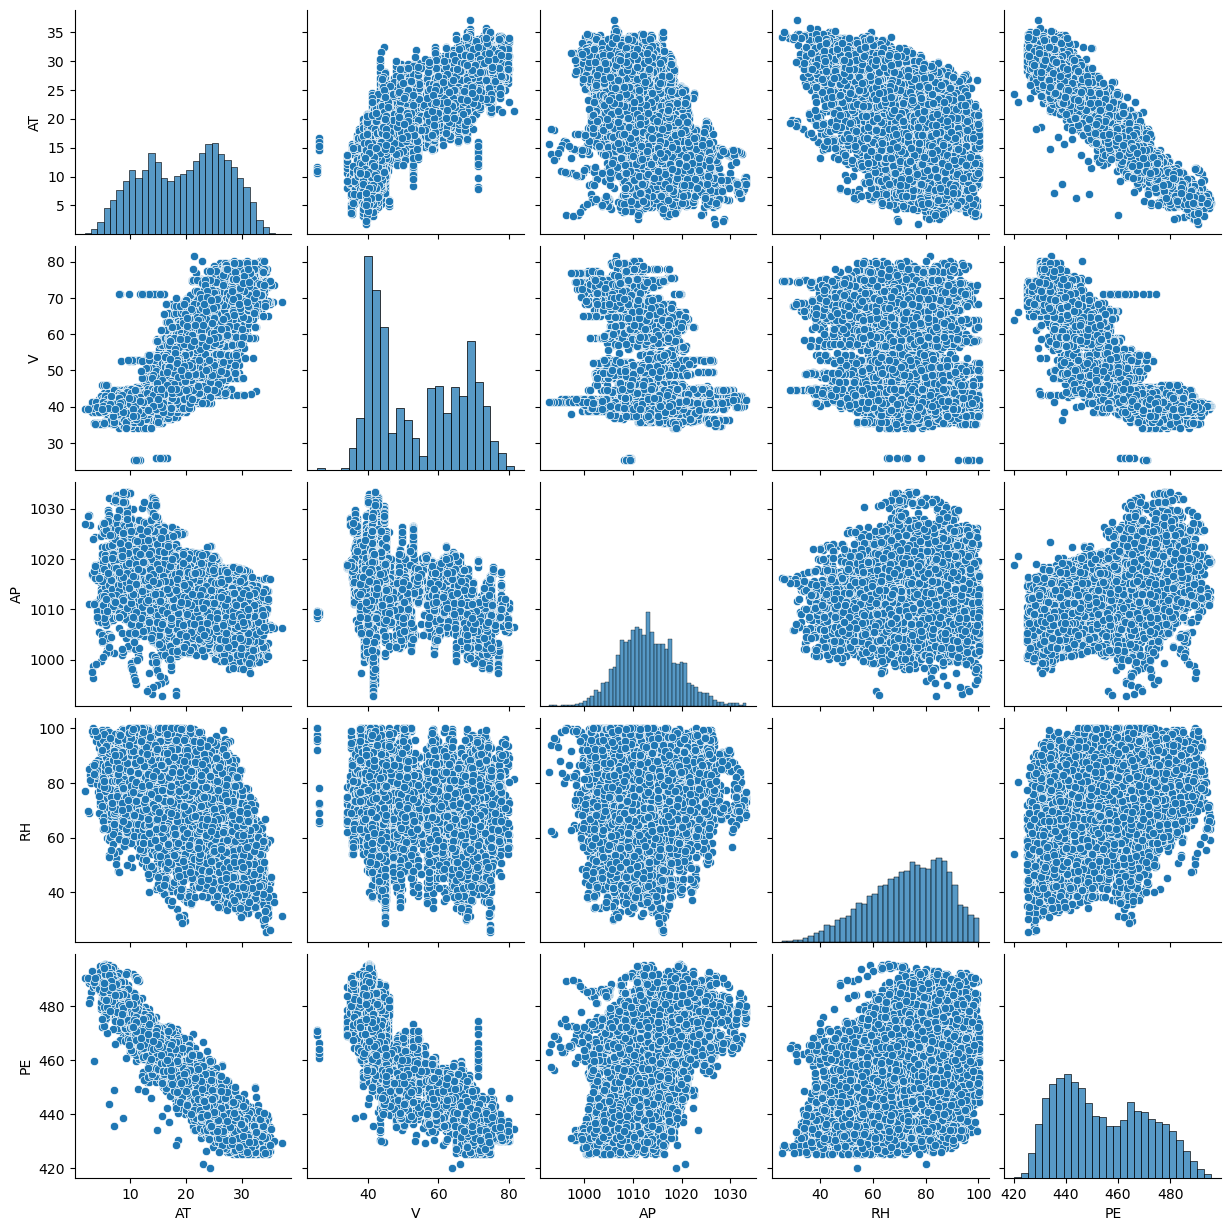

In [4]:
sns.pairplot(data)


The dependent variable energy output has tightly linear relationship with some features. In the figure, the AT is obviously positive related to the dependent variable. While the other three features do not demonstrate clear relationship with the EP.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### (c) Simple Linear Regression

For each predictor, ﬁt a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks

In [6]:
data.columns
uni_var = []

In [7]:
def uni_simple_lr(x):
    y_train = data["PE"]
    x_train = data[[x]]
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_train)
    r2 = r2_score(y_train, y_pred)

    uni_var.append(lr.coef_[0])
    t_stat, p_value = ttest_ind(data["PE"], y_pred, equal_var=False)
    print(f"R_square value is {r2}")
    print(f"The t-statistics is {t_stat}, P-value is {1 - p_value}")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train, y_train, s=5)
    plt.plot(x_train, y_pred, color='blue', linewidth=3)
    plt.xlabel('x')
    plt.ylabel('PE')

    return



R_square value is 0.8989475964148236
The t-statistics is 0.0, P-value is 0.0


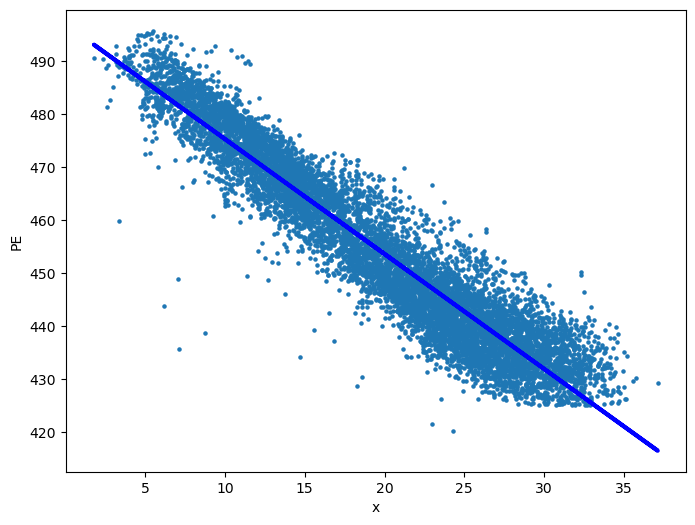

In [8]:
uni_simple_lr('AT')

R_square value is 0.7565177870683979
The t-statistics is 0.0, P-value is 0.0


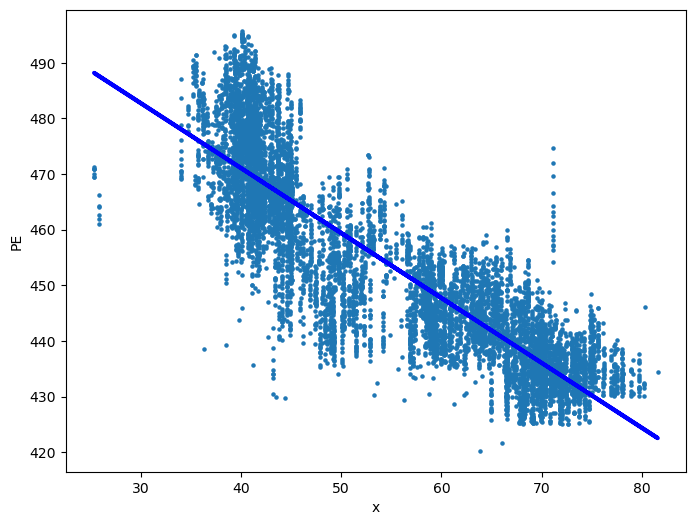

In [9]:
uni_simple_lr('V')

R_square value is 0.2687686564110674
The t-statistics is -8.676883109838133e-13, P-value is 6.923350781562476e-13


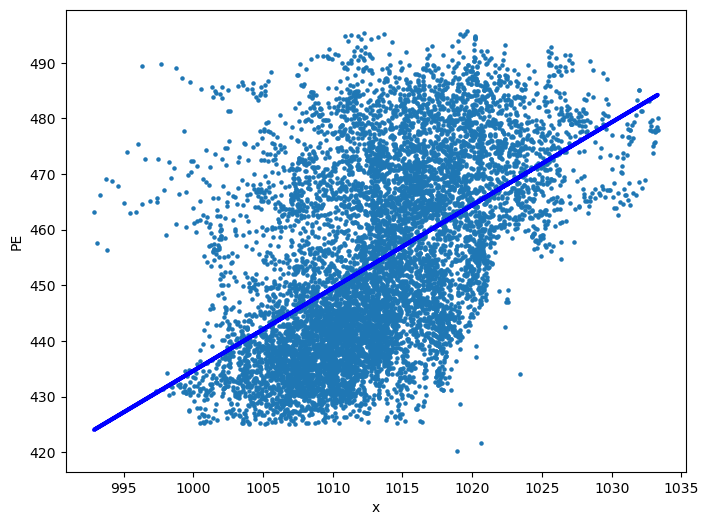

In [10]:
uni_simple_lr('AP')

R_square value is 0.15193944023117578
The t-statistics is 0.0, P-value is 0.0


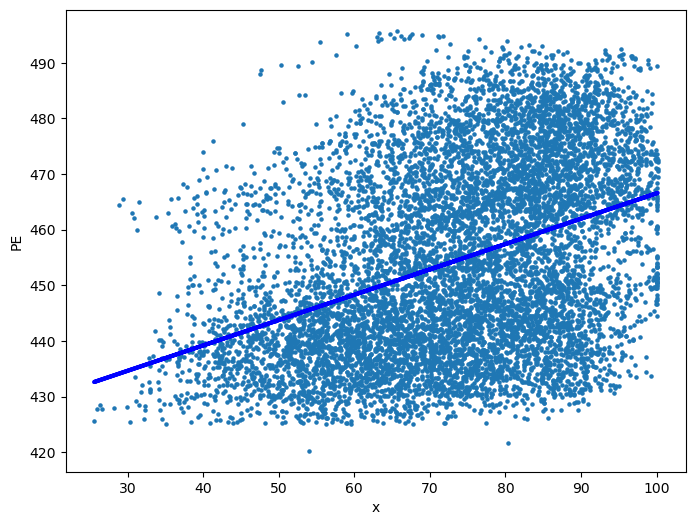

In [11]:
uni_simple_lr('RH')

I noticed that the models with the predictors variable AT and V has significantly associations between the predictor and the reponses. While they are all significantly correlated with the dependent variables. 

Among those models, I can claim that most of them contains some kind of outliers but in the AT and V all the data are relatively tighter clustered while in the other features, the data are in chaos and scattered everywhere among the data space

### (d) Multiple Regression

In [12]:
uni_var

[-2.171319958517794,
 -1.1681351265557127,
 1.4898716733991142,
 0.45565010226298003]

In [13]:
multiple_coeffs = []
def mul_lr():
    x_train = data[['AT', 'V', 'AP', 'RH']]
    y_train = data['PE']
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_train)
    multiple_coeffs.append(lr.coef_[::])
    r2 = r2_score(y_train, y_pred)
    t_stat, p_value = ttest_ind(data["PE"], y_pred, equal_var=False)
    print(f"R_square value is {r2}")
    print(f"The t-statistics is {t_stat}, P-value is {1 - p_value}")

mul_lr()

R_square value is 0.9286960898122536
The t-statistics is -2.345858502827889e-13, P-value is 1.871836019518014e-13


In [14]:
multiple_coeffs = multiple_coeffs[0]
multiple_coeffs

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

For all the predictors' case, the R_2 will reach 0.92 which is significantly higher than former cases. we can reject the null hypothesis since the p-value is obviously close to 0. Multi-LR case is better than single feature case

### (e) 1c Compare to 1d

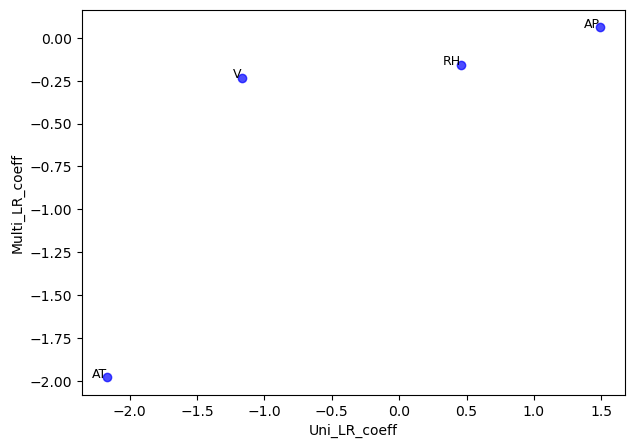

In [15]:
plt.figure(figsize=(7, 5))
plt.scatter(uni_var, multiple_coeffs, color="blue", alpha=0.7)
cols = data.columns
for i, predictor in enumerate(cols[:-1]):
    plt.text(uni_var[i], multiple_coeffs[i], predictor, fontsize=9, ha="right")


plt.ylabel('Multi_LR_coeff')
plt.xlabel('Uni_LR_coeff')
plt.show()

### (f) Nonlinear Association

In [16]:
def nonlinear_lr(x):
    y_train = data["PE"]
    x_train = data[[x]]

    poly = PolynomialFeatures(degree=3, include_bias=False)
    x_poly = poly.fit_transform(x_train)

    lr = LinearRegression()
    lr.fit(x_poly, y_train)
    y_pred = lr.predict(x_poly)
    r2 = r2_score(y_train, y_pred)
    t_stat, p_value = ttest_ind(data["PE"], y_pred, equal_var=False)
    print(f"R_square value is {r2}")
    print(f"The t-statistics is {t_stat}, P-value is {1 - p_value}")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train, y_train, s=5)
    plt.plot(x_train, y_pred, color='blue', linewidth=3)
    plt.xlabel('x')
    plt.ylabel('PE')

    return


R_square value is 0.9118826627742724
The t-statistics is 0.0, P-value is 0.0


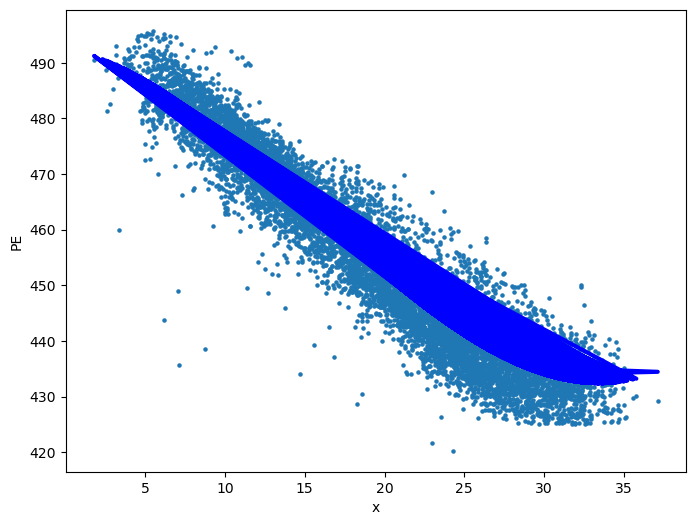

In [17]:
nonlinear_lr("AT")

In [18]:
data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

R_square value is 0.7750219775589422
The t-statistics is -7.335894893076631e-13, P-value is 5.853095785823825e-13


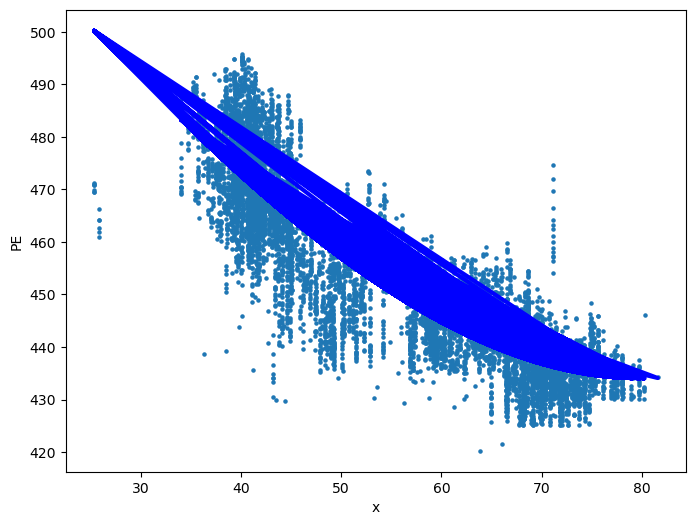

In [19]:
nonlinear_lr("V")

R_square value is 0.29754346577848423
The t-statistics is -3.8646147991267885e-07, P-value is 3.0834643860444544e-07


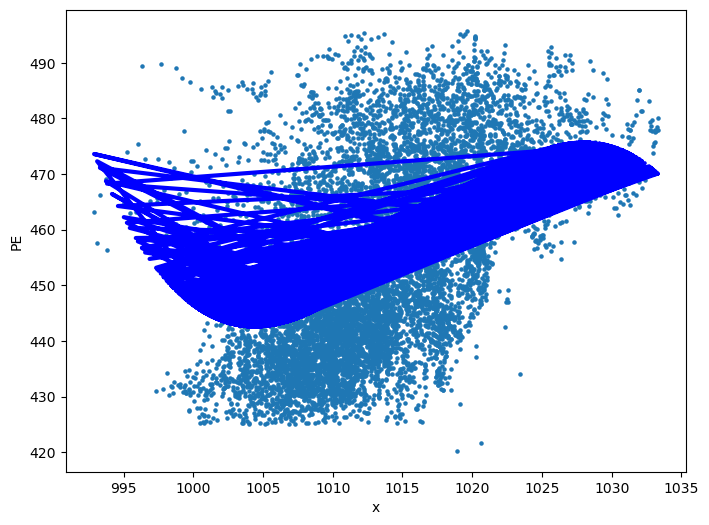

In [20]:
nonlinear_lr("AP")

R_square value is 0.15374253544345973
The t-statistics is 4.852876547290249e-12, P-value is 3.872013820682696e-12


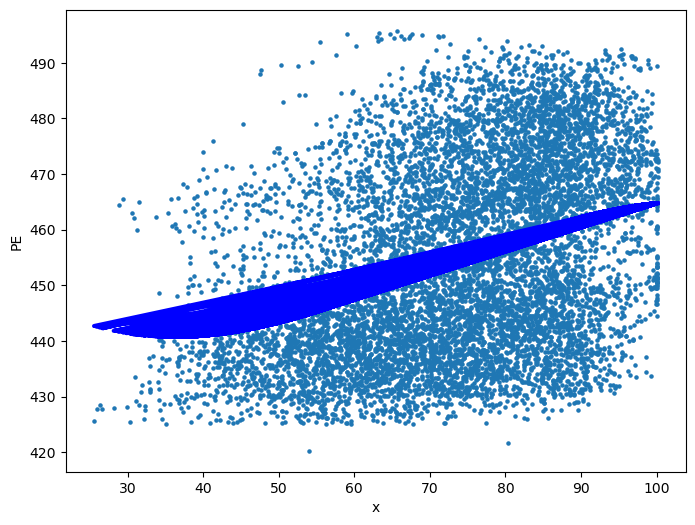

In [21]:
nonlinear_lr("RH")

From the model statistics above, there maybe exist a nonlinear polynomial relationship between the feature AT and the PE. For the other features, the R-square statistics are not significant enough to prove that.

### (g) Interactions of Predictors

In [22]:
def interactions_predictors():
    x_train = data[['AT', 'V', 'AP', 'RH']]
    y_train = data['PE']


    poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only= True)
    x_poly = poly.fit_transform(x_train)
    lr = sm.OLS(y_train, x_poly)
    result = lr.fit()
    print(result.summary())

    print(poly.get_feature_names_out(input_features=['AT', 'V', 'AP', 'RH']))
    
interactions_predictors()

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.727e+06
Date:                Sun, 16 Feb 2025   Prob (F-statistic):                        0.00
Time:                        03:11:26   Log-Likelihood:                         -27472.
No. Observations:                9568   AIC:                                  5.497e+04
Df Residuals:                    9554   BIC:                                  5.507e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Yes, there exist some interactions between those variables. The combinations are ['AT' 'V' 'AP' 'RH' 'AT V' 'AT AP' 'AT RH' 'V AP' 'V RH' 'AP RH' 'AT V AP' 'AT V RH' 'AT AP RH' 'V AP RH'] for the degree = 3, The interaction terms are statistically significantly nearly all  the combinations while the AT-V-RH permutation is not that significant.

### (h) Improvement

In [23]:
train_set, test_set = train_test_split(data, train_size= 0.7)
X_train = train_set[["AT", "V", "AP", "RH"]]
Y_train = train_set["PE"]
X_test = test_set[["AT", "V", "AP", "RH"]]
Y_test = test_set["PE"]

In [24]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
lr_train_error = mean_squared_error(y_train_pred, Y_train)
lr_test_error = mean_squared_error(y_pred, Y_test)
print(f"The train error is {lr_train_error}, the test error is {lr_test_error}")

The train error is 20.298513806417816, the test error is 21.867516841262702


In [25]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)

lr2 = LinearRegression()
lr2.fit(x_poly, Y_train)

y_train_pred = lr2.predict(x_poly)
y_pred_poly = lr2.predict(x_test_poly)
lr2_train_error = mean_squared_error(y_train_pred, Y_train)
lr2_test_error = mean_squared_error(y_pred_poly, Y_test)
print(f"The train error is {lr2_train_error}, the test error is {lr2_test_error}")

The train error is 17.73479707082743, the test error is 18.99170796720318


### (i) KNN

In [26]:
s = MinMaxScaler()
scale = s.fit(X_train)
X_train_n = scale.transform(X_train)
X_test_n = scale.transform(X_test)

In [27]:
kv = [i for i in range(1, 101)]
k_inverse = [1/i for i in range(1,101)]

In [28]:
import numpy as np


In [29]:
tr_mse = []
te_mse = []
for k in kv:
    re = KNeighborsRegressor(k)
    re.fit(X_train_n, Y_train)
    tr_pred = re.predict(X_train_n)
    te_pred = re.predict(X_test_n)
    tr_mse.append(mean_squared_error(tr_pred, Y_train))
    te_mse.append(mean_squared_error(te_pred, Y_test))


print(f'min train mse with normalization is {min(tr_mse)}')
print(f'Optimal k for train is {kv[np.argmin(tr_mse)]}')
print(f'min train mse with normalization is {min(te_mse)}')
print(f'Optimal k for test is {kv[np.argmin(te_mse)]}')

# Store test MSE
min_te_mse_normalization = min(te_mse)

min train mse with normalization is 0.0
Optimal k for train is 1
min train mse with normalization is 15.43940438732149
Optimal k for test is 5


In [30]:
print(len(k_inverse))

100


In [31]:
print(len(tr_mse))

100


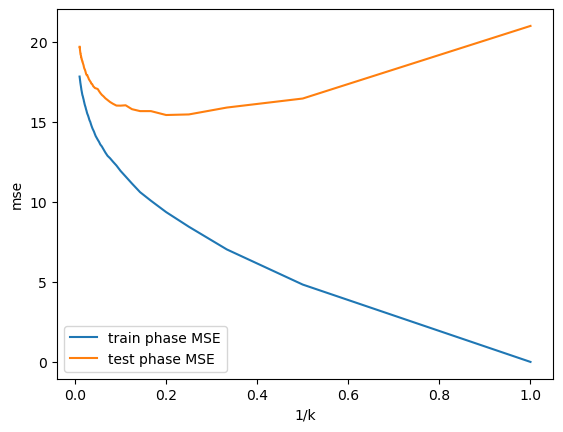

In [32]:
plt.plot(k_inverse, tr_mse, label='train phase MSE')
plt.plot(k_inverse, te_mse, label='test phase MSE')
plt.xlabel('1/k')
plt.ylabel('mse')
plt.legend()
plt.show()


In [33]:
tr_mse = []
te_mse = []
for k in kv:
    neigh = KNeighborsRegressor(k)
    neigh.fit(X_train, Y_train)
    tr_pred = neigh.predict(X_train)
    te_pred = neigh.predict(X_test)
    tr_mse.append(mean_squared_error(Y_train, tr_pred))
    te_mse.append(mean_squared_error(Y_test, te_pred))

print(f'min train mse with raw data is {min(tr_mse)}')
print(f'Optimal k for train is {kv[np.argmin(tr_mse)]}')
print(f'min train mse with raw data is {min(te_mse)}')
print(f'Optimal k for test is {kv[np.argmin(te_mse)]}')
min_te_mse_raw = min(te_mse)

min train mse with raw data is 0.0
Optimal k for train is 1
min train mse with raw data is 16.87744948406478
Optimal k for test is 4


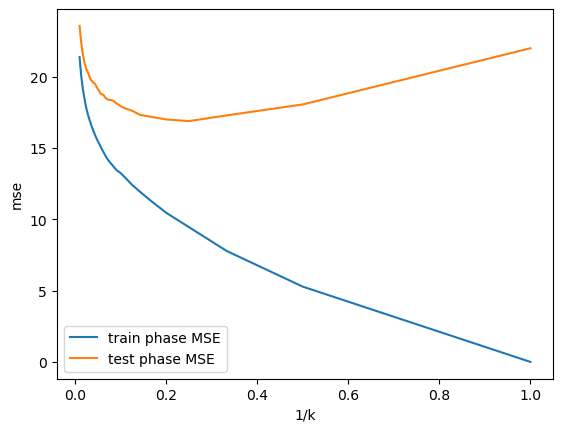

In [34]:
plt.plot(k_inverse, tr_mse, label='train phase MSE')
plt.plot(k_inverse, te_mse, label='test phase MSE')
plt.xlabel('1/k')
plt.ylabel('mse')
plt.legend()
plt.show()

### (j ) Compare KNN and Linear

In [35]:
print(f"Normalization is {min_te_mse_normalization}, Raw data is {min_te_mse_raw}")
print(f"lr test error is {lr_test_error}, lr2 test error is {lr2_test_error}")

Normalization is 15.43940438732149, Raw data is 16.87744948406478
lr test error is 21.867516841262702, lr2 test error is 18.99170796720318


The KNN Regerssion has the lowest mse, and the normalization enhances the performance of the KNN regressor. This is probably because there exist some nonlinear association within independent variables. And KNN can capture more spatial features in the data space and more explainability on those interactions between data.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

Better. Having large sample size n can increase the generalization of whole data space and smaller number of predictors will decrease the dependency to on predictors. This makes the model more flexible

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Worse. Contradictory to the former question. Smaller sample size will not be able to capture the rules and statistical attributes within the data. More predictors increase the computational cose and makes the model too complex even the overfitting.

### (c) The relationship between the predictors and response is highly non-linear.

Better. We need more flexbility to explain the nonlinear relationship between the predictors and response. We expect the flexible model to capture more nonlinear relationship to reduce some bias and increase the precision.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

inflexible model is better. The high variance means too much more noise in the data. Inflexible model can handle those noises well.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

d = [3, 2, sqrt(10), sqrt(5), sqrt(2), sqrt(3)]

### (b) What is our prediction with K = 1? Why?

When K = 1, the model will assign the nearest neighbor to the test point. The prediction is 5, which is green since sqrt(2) is the nearest distance.

### (c) What is our prediction with K = 3? Why?

Green. K = 3. The nearest 3 points is sqrt(2), sqrt(3), sqrt(5). The green points are the majority.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

smaller. If K is large, the model is unstable and the boundary will be linear. While the smaller K will make the boundary linear.